In [1]:
import numpy as np
import pylab as plt

In [58]:
def f(S):
#    return 2*len(S) * (5 - len(S)) - len(S & set([1,3])) + 2 * len((S & set([2])))
    return 2*len(S) * (5 - len(S)) - 8 * len(S & set([1,3])) + 16 * len((S & set([2])))

In [59]:
def get_endpoint(L, f):
    x = [0 for _ in L]
    for j in range(len(L), 0, -1):
        x[L[j-1]-1] = (f(set(L[:j])) - f(set(L[:j-1])))
    return np.array(x)

In [60]:
def minimum_norm(f, initial_L):
    X = set()
    # step0
    hat_x = get_endpoint(initial_L, f)
    hat_lam = np.array([1])
    X.add(tuple(hat_x))
    print("x0", hat_x)
    
    while True:
        # step1
        print("step1")
        x = get_endpoint(np.argsort(hat_x)+1, f) # greedy algorithm for linear programming (algorithm 2.3)
        print("x", x)
        print("x_indexes", np.argsort(hat_x)+1)
        
        if abs((x-hat_x) @ hat_x) < 1e-10:
            x_star = hat_x
            S_star = np.where(hat_x<0)[0] + 1
            return x_star, S_star
        X.add(tuple(x))
        hat_lam = np.r_[hat_lam, 0]
        print("hat_lam", hat_lam)
        print("X", X)
        
        while True:
            # step2
            print("step2")
            XX = np.array(list(X)) @ np.array(list(X)).T
            ones = np.ones(XX.shape[0])
            inv_XX = np.linalg.inv(XX)
            lam = (inv_XX@ones) / (ones @ inv_XX @ ones)
            y = np.array(list(X)).T @ lam
            print("y", y)

            if np.sum(lam>0) == len(lam): # True for all items in lam
                hat_x = y
                hat_lam = lam
                break # goto step1
            else:
                # step3
                print("step3")
                hat_lam = np.array(hat_lam)
                alpha = np.min(lam / (lam - hat_lam)) 
                dash_lam = (1-alpha) * lam + alpha*hat_lam
                xd = np.array(list(X)).T @ dash_lam
                print("xd", xd)
                Xd = set()
                for xi, lam_i in zip(list(X), dash_lam):
                    if lam_i > 0:
                        Xd.add(tuple(xi))
                X = Xd
                hat_x = x
                # goto step2

In [61]:
minimum_norm(f, [3, 2,1])

x0 [-8 20  0]
step1
x [ 0 16 -4]
x_indexes [1 3 2]
hat_lam [1 0]
X {(0, 16, -4), (-8, 20, 0)}
step2
y [ 4. 14. -6.]
step3
xd [ 0. 16. -4.]
step2
y [ 0. 16. -4.]
step1
x [-4 16  0]
x_indexes [3 1 2]
hat_lam [1. 0.]
X {(-4, 16, 0), (0, 16, -4)}
step2
y [-2. 16. -2.]
step1
x [ 0 16 -4]
x_indexes [1 3 2]


(array([-2., 16., -2.]), array([1, 3]))

In [62]:
import pylab as plt

In [63]:
from mpl_toolkits.mplot3d import Axes3D

In [64]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 15})

x0 [-4 24 -8]
step1
x [-4 16  0]
x_indexes [3 1 2]
hat_lam [1 0]
X {(-4, 16, 0), (-4, 24, -8)}
step2
y [-4.  8.  8.]
step3
xd [-4. 16.  0.]
step2
y [-4. 16.  0.]
step1
x [ 0 16 -4]
x_indexes [1 3 2]
hat_lam [1. 0.]
X {(0, 16, -4), (-4, 16, 0)}
step2
y [-2. 16. -2.]
step1
x [ 0 16 -4]
x_indexes [1 3 2]


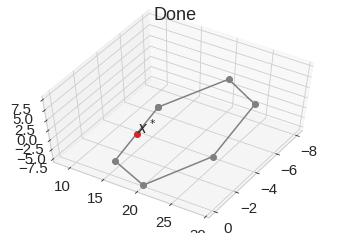

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(57, 32)
ax.set_ylim(8,30)
ax.set_zlim(-8,8)


i = 0

end_points = np.array([[-4, 16, 0],
                       [0,  16,-4],
                       [0,  20,-8],
                       [-4, 24,-8],
                       [-8, 24,-4],
                       [-8, 20, 0],
                       [-4, 16, 0]])

ax.plot(end_points[:,0], end_points[:,1], end_points[:,2], marker="o", c="gray")


X = set()
# step0
hat_x = get_endpoint([2,1,3], f)
hat_lam = np.array([1])
X.add(tuple(hat_x))
print("x0", hat_x)

ax.plot([hat_x[0]], [hat_x[1]], [hat_x[2]], marker="o", c="C0")
ax.text(hat_x[0], hat_x[1], hat_x[2], "$\hat x$")
plt.title("Step 0")
plt.savefig("%d.png"%i)
i+=1

while True:
    # step1
    print("step1")
    x = get_endpoint(np.argsort(hat_x)+1, f) # greedy algorithm for linear programming (algorithm 2.3)
    print("x", x)
    print("x_indexes", np.argsort(hat_x)+1)
    
    ax.cla()
    ax.set_ylim(8,30)
    ax.set_zlim(-8,8)
    ax.plot(end_points[:,0], end_points[:,1], end_points[:,2], marker="o", c="gray")
    ax.plot([hat_x[0], x[0]], [hat_x[1],x[1]], [hat_x[2], x[2]], marker="o", c="C1")
    ax.text(hat_x[0], hat_x[1], hat_x[2], "$\hat x$")
    ax.text(x[0], x[1], x[2], "$x$")

    plt.title("Step 1")
    plt.savefig("%d.png"%i)
    i+=1
    
    if abs((x-hat_x) @ hat_x) < 1e-10:
        x_star = hat_x
        S_star = np.where(hat_x<0)[0] + 1
        ax.cla()
        ax.set_ylim(8,30)
        ax.set_zlim(-8,8)
        ax.plot(end_points[:,0], end_points[:,1], end_points[:,2], marker="o", c="gray")
        ax.plot([hat_x[0]], [hat_x[1]], [hat_x[2]], marker="o", c="C3")
        ax.text(hat_x[0], hat_x[1], hat_x[2], "$x^*$")
        plt.title("Done")
        plt.savefig("%d.png"%i)
        i+=1

        break
    X.add(tuple(x))
    hat_lam = np.r_[hat_lam, 0]
    print("hat_lam", hat_lam)
    print("X", X)

    while True:
        # step2
        print("step2")
        XX = np.array(list(X)) @ np.array(list(X)).T
        ones = np.ones(XX.shape[0])
        inv_XX = np.linalg.inv(XX)
        lam = (inv_XX@ones) / (ones @ inv_XX @ ones)
        y = np.array(list(X)).T @ lam
        print("y", y)

        if np.sum(lam>0) == len(lam): # True for all items in lam
            hat_x = y
            hat_lam = lam
            ax.cla()
            ax.set_ylim(8,30)
            ax.set_zlim(-8,8)
            ax.plot(end_points[:,0], end_points[:,1], end_points[:,2], marker="o", c="gray")
            ax.plot([hat_x[0], x[0], y[0]], [hat_x[1],x[1], y[1]], [hat_x[2], x[2], y[2]], marker="o", c="C2")
            ax.text(y[0], y[1], y[2], "$\hat x = y$")

            plt.title("Step 2")
            plt.savefig("%d.png"%i)
            i+=1
            break # goto step1
            
        
        else:
            ax.cla()
            ax.set_ylim(8,30)
            ax.set_zlim(-8,8)
            ax.plot(end_points[:,0], end_points[:,1], end_points[:,2], marker="o", c="gray")
            ax.plot([hat_x[0], x[0], y[0]], [hat_x[1],x[1], y[1]], [hat_x[2], x[2], y[2]], marker="o", c="C2")
            ax.plot([y[0]], [y[1]], [y[2]], marker="o", c="C2")
            ax.text(hat_x[0], hat_x[1], hat_x[2], "$\hat x$")
            ax.text(y[0], y[1], y[2], "$y$")

            plt.title("Step 2")
            plt.savefig("%d.png"%i)
            i+=1
        
            # step3
            print("step3")
            hat_lam = np.array(hat_lam)
            alpha = np.min(lam / (lam - hat_lam)) 
            dash_lam = (1-alpha) * lam + alpha*hat_lam
            xd = np.array(list(X)).T @ dash_lam
            print("xd", xd)
            Xd = set()
            for xi, lam_i in zip(list(X), dash_lam):
                if lam_i > 0:
                    Xd.add(tuple(xi))
            X = Xd
            hat_x = x
            
            ax.cla()
            ax.set_ylim(8,30)
            ax.set_zlim(-8,8)
            ax.plot(end_points[:,0], end_points[:,1], end_points[:,2], marker="o", c="gray")
            ax.plot([hat_x[0]], [hat_x[1]], [hat_x[2]], marker="o", c="C3")
            ax.text(hat_x[0], hat_x[1], hat_x[2], "$x'$")

            plt.title("Step 3")
            plt.savefig("%d.png"%i)
            i+=1
            # goto step2